## The Sparks Foundation - Data Science & Business Analytics Internship


## Author : Tuhin Majumdar

## GRIP Task 6 : Prediction Using Decision Tree Algorithm

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Drop 'Id' column as it is unique feature

In [4]:
df = df.drop('Id',axis=1)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Statistical Description

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

### Outlier detection

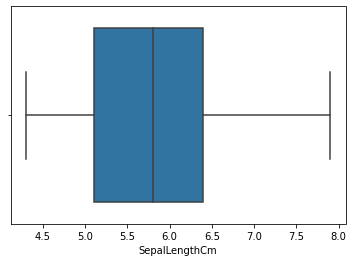

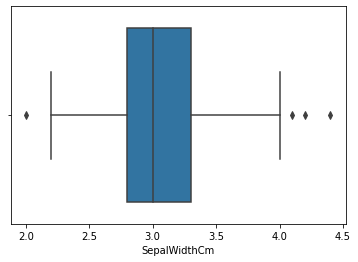

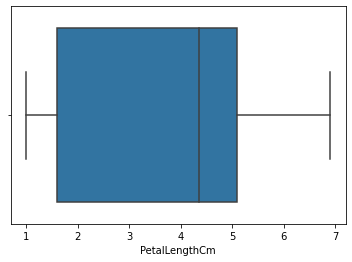

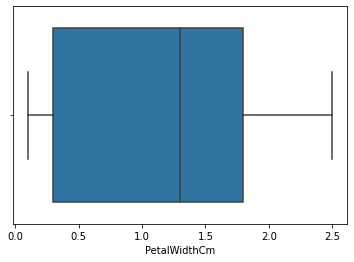

In [8]:
for i in df.columns[0:4]:
    sns.boxplot(df[i])
    plt.show()

 - Observation - Here we can see the second feature 'SepalWithCm' has outliers

### Outlier Treatment

In [9]:
# First and Third quartile
q1 = df["SepalWidthCm"].quantile(0.25)
q3 = df["SepalWidthCm"].quantile(0.75)

# Inter quartile range
iqr = q3 - q1
lower_limit = q1-1.5*iqr 
upper_limit = q3+1.5*iqr 

# Removing the outliers
df = df[(df["SepalWidthCm"] > lower_limit) & (df["SepalWidthCm"] < upper_limit)]

In [10]:
df.shape

(146, 5)

<AxesSubplot:xlabel='SepalWidthCm'>

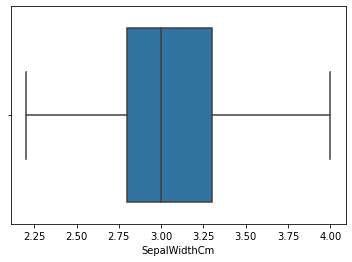

In [11]:
sns.boxplot(df['SepalWidthCm'])

 - Here we can see that the outlier is removed from 'SepalWidthCm'

### Perform Label encoding to transform categorical output into numerical data

In [12]:
df.Species = LabelEncoder().fit_transform(df.Species)

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Seperate Input features (X) and output variable(y) and divide them into train and test data

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (116, 4)
y_train shape : (116,)
X_test shape : (30, 4)
y_test shape : (30,)


### Fitting the training data into DecisionTree classifier object

In [17]:
classifier = DecisionTreeClassifier(random_state=1)

In [18]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [19]:
y_pred = classifier.predict(X_test)

### Create a dataframe with actual and predicted output for better understanding

In [20]:
pd.DataFrame(index=['y_test','y_pred'],data=[y_test,y_pred]).T

,y_test,y_pred
0,2,2
1,1,2
2,1,1
3,1,1
4,2,2
5,1,1
6,2,2
7,2,2
8,0,0
9,1,1


#### ACCURACY

In [21]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9333333333333333


#### CLASSIFICATION REPORT

In [22]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        11
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



### Create the Decision Tree

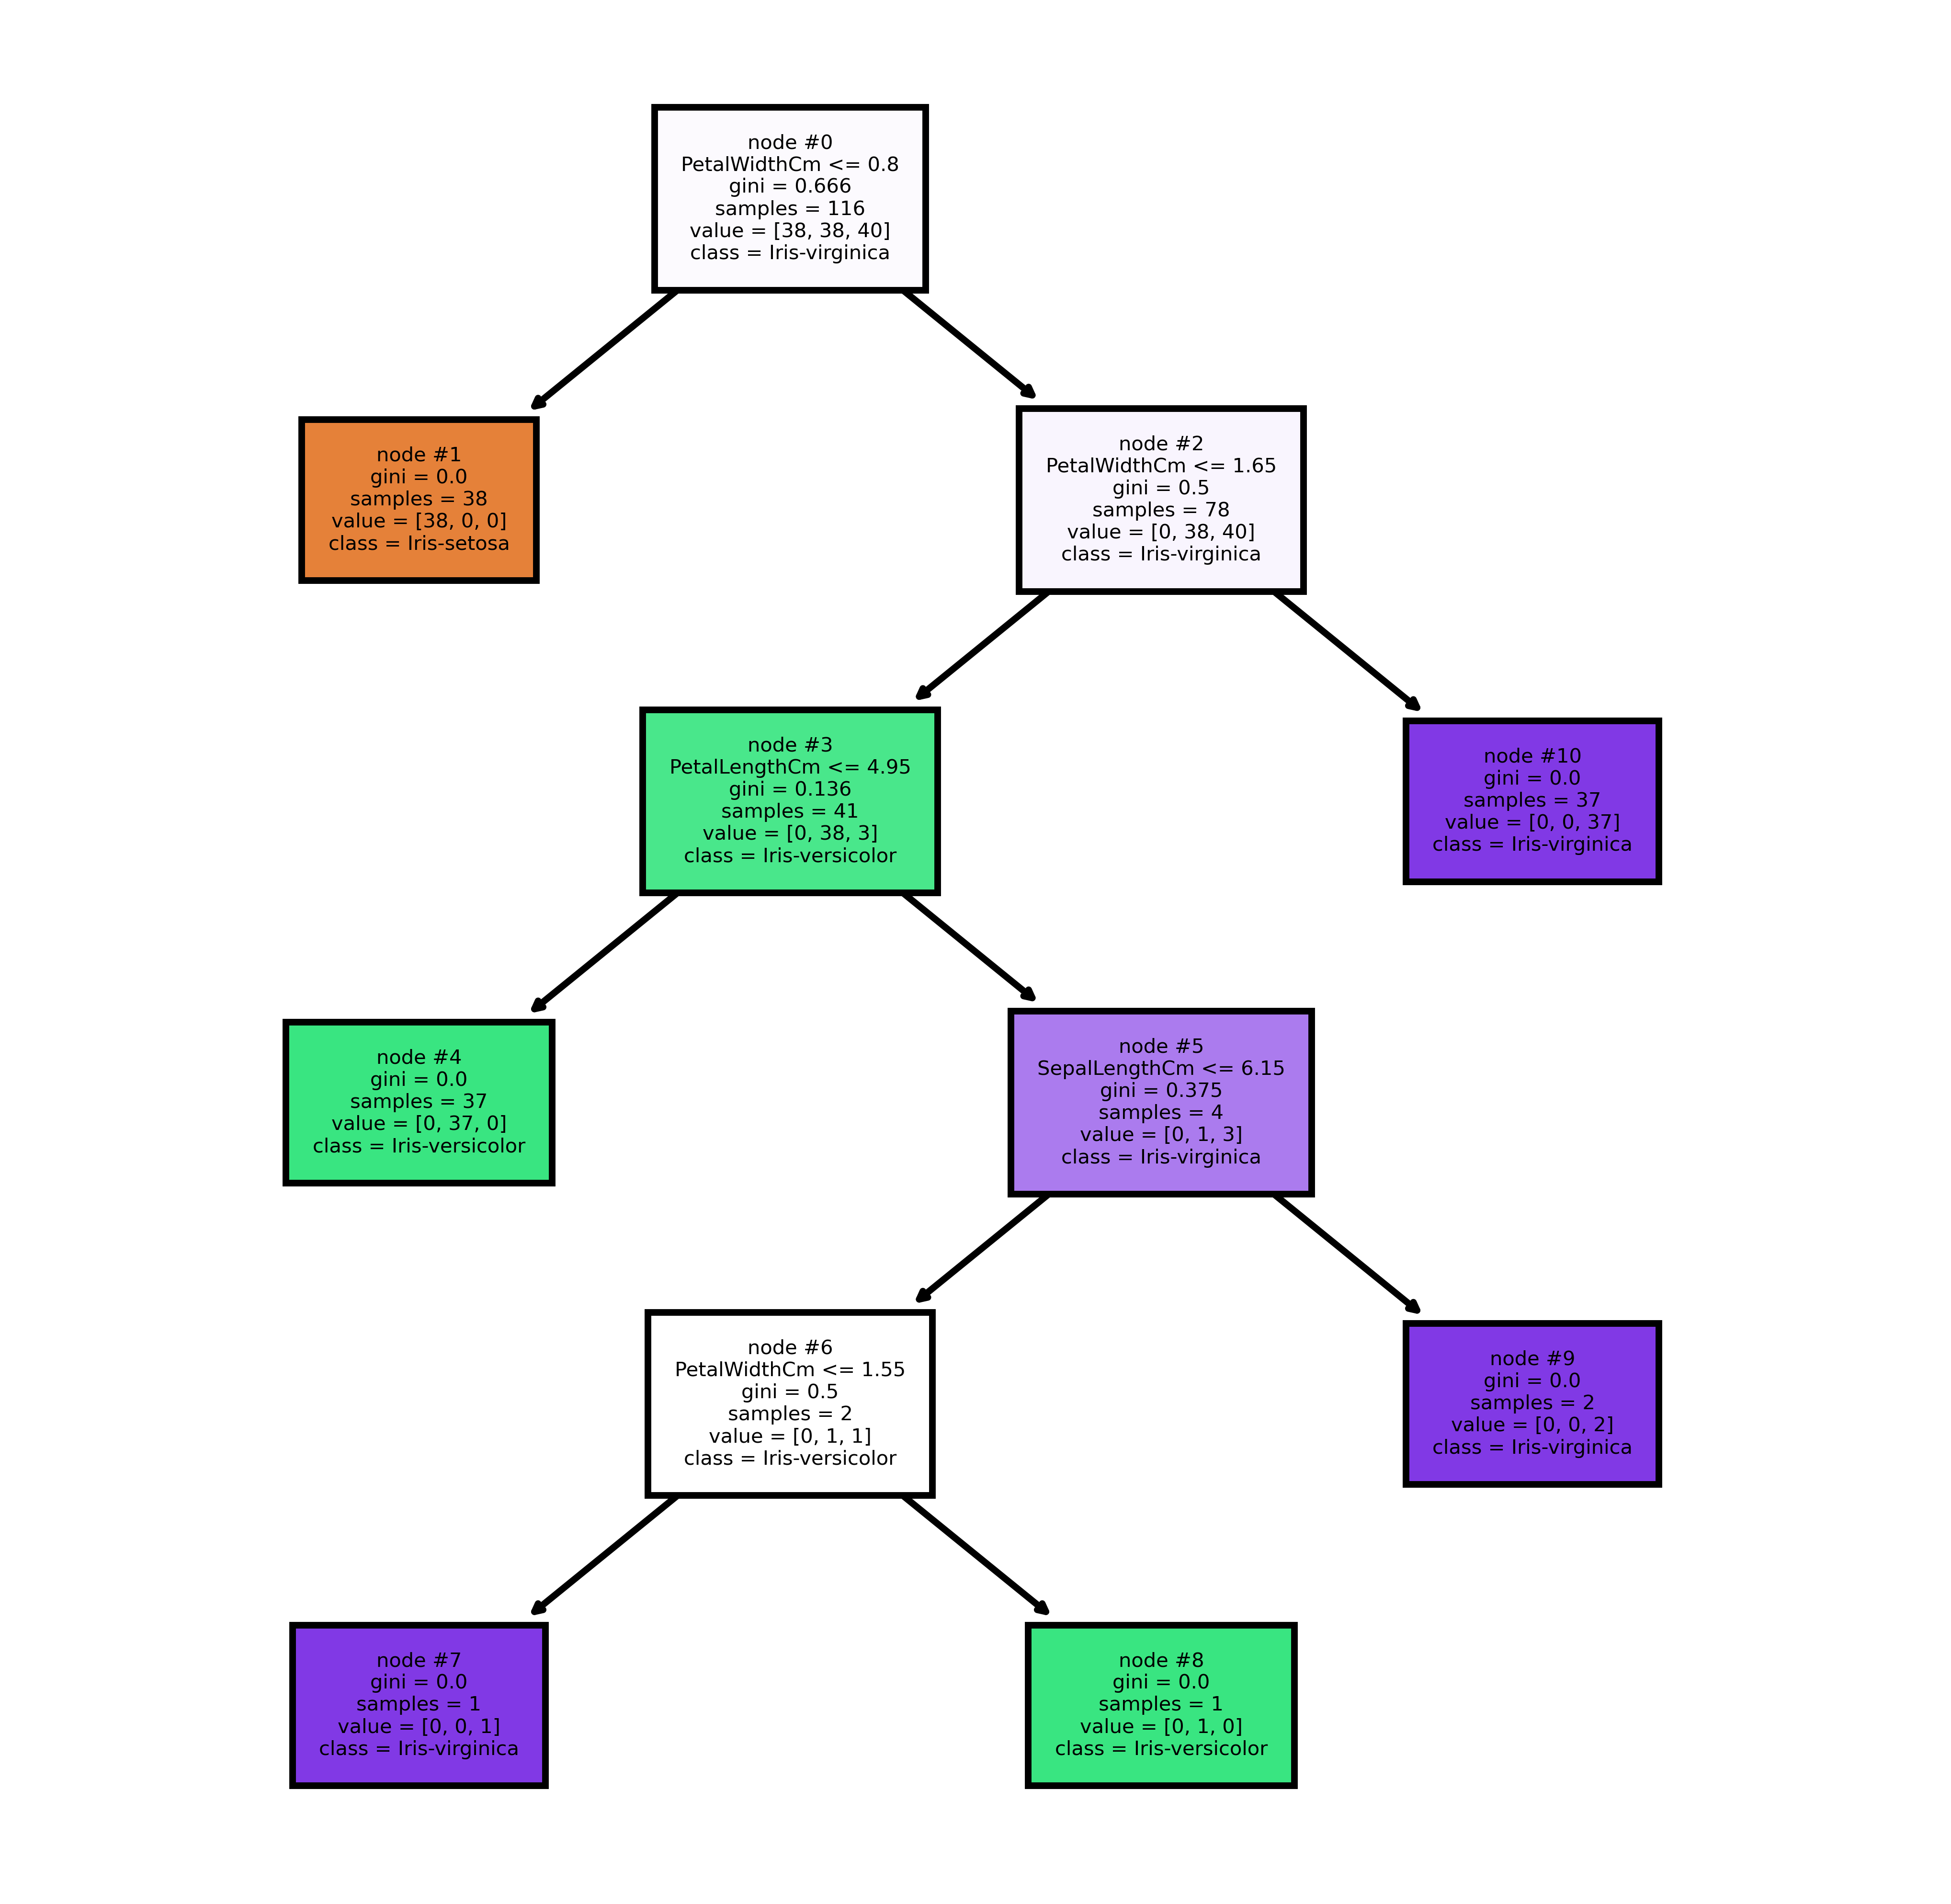

In [23]:
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=1000)
tree.plot_tree(classifier, feature_names = df.columns[0:4], class_names = Species,filled = True, 
                                                                                       node_ids = True, fontsize = 3); 

### The decision tree classifier has been created and it can be used for further prediction